In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint
from skopt import BayesSearchCV
from skopt.space import Integer
from sklearn.metrics import accuracy_score

In [6]:
data = np.load('../bases/Titanic.npz', allow_pickle=True)
X_treino, X_teste, y_treino, y_teste, feature_names = data['X_treino'], data['X_teste'], data['y_treino'], data['y_teste'], list(data['feature_names'])

In [7]:
modelo = DecisionTreeClassifier(criterion='gini', max_depth=5,)

In [8]:
param_grid = {
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [None, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_dist = {
    'criterion':  ['gini', 'entropy'],
    'max_depth': randint(1, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
}


param_bayes = {
    'criterion':  ['gini', 'entropy'],
    'max_depth': Integer(1, 50),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 10),
}

In [9]:
def plot_decision_tree(model, feature_names, class_names, title):
    plt.figure(figsize=(30, 15))
    plot_tree(model, filled=True, feature_names=feature_names, class_names=class_names, rounded=True, fontsize=10)
    plt.title(title)
    plt.show()


In [10]:
grid_search = GridSearchCV( DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_treino, y_treino)
print("Melhores parâmetros encontrados com GridSearchCV:")
print(grid_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(grid_search.best_score_))

Melhores parâmetros encontrados com GridSearchCV:
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 0.6, 'min_samples_leaf': 4, 'min_samples_split': 10}
Melhor pontuação de validação cruzada: 0.82


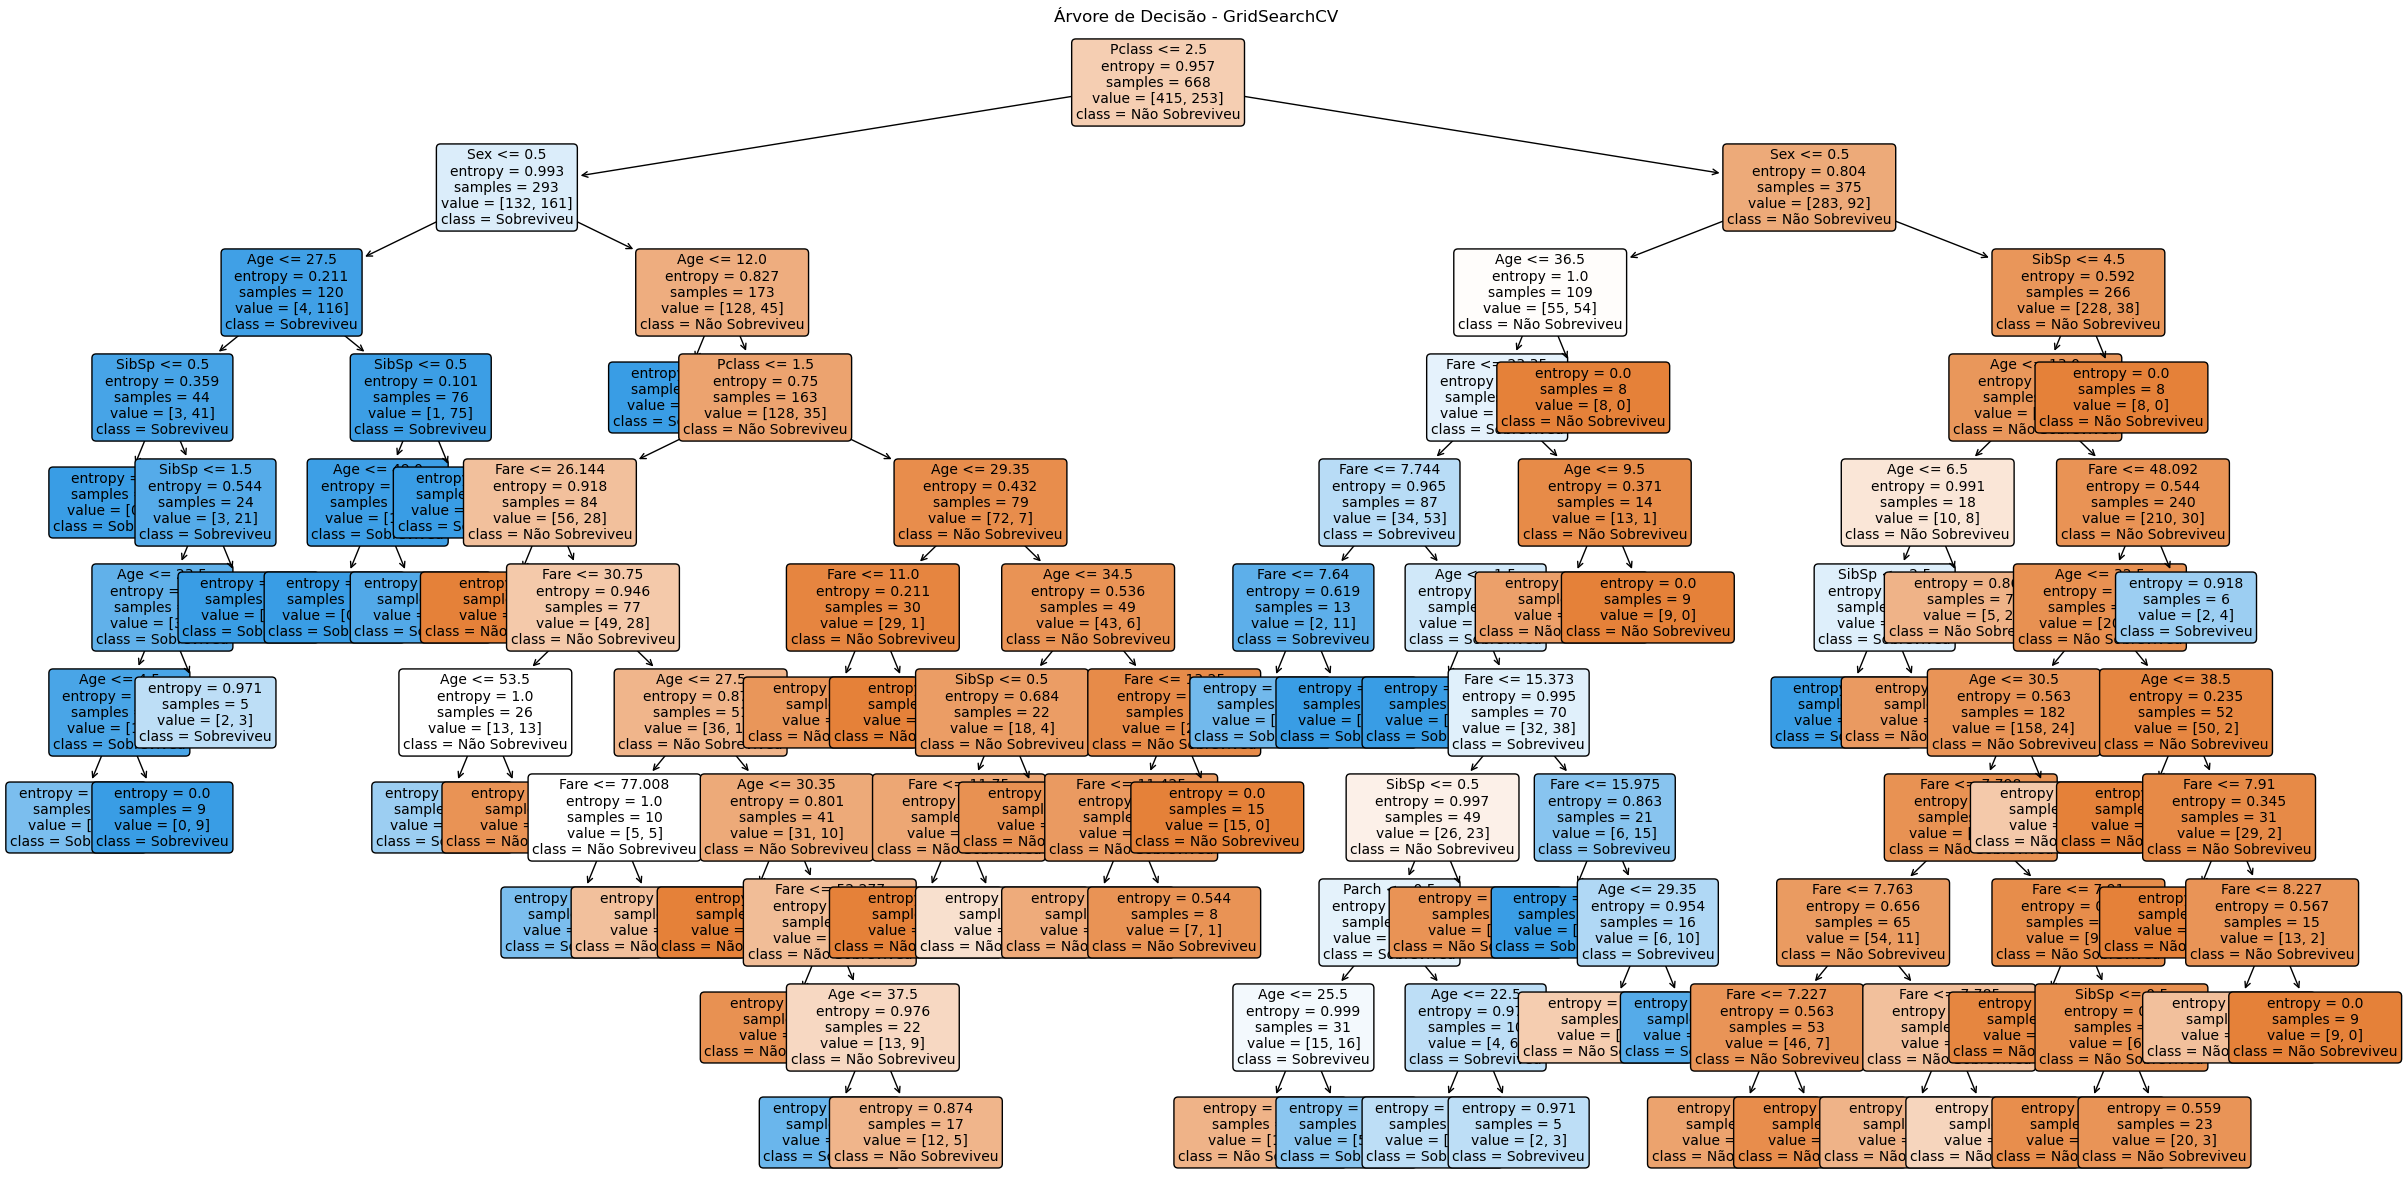

In [11]:
best_model_grid = grid_search.best_estimator_
plot_decision_tree(best_model_grid, feature_names, ['Não Sobreviveu', 'Sobreviveu'], "Árvore de Decisão - GridSearchCV")

In [12]:
random_search = RandomizedSearchCV(DecisionTreeClassifier(), param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_treino, y_treino)
print("\nMelhores parâmetros encontrados com RandomizedSearchCV:")
print(random_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(random_search.best_score_))


Melhores parâmetros encontrados com RandomizedSearchCV:
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Melhor pontuação de validação cruzada: 0.82


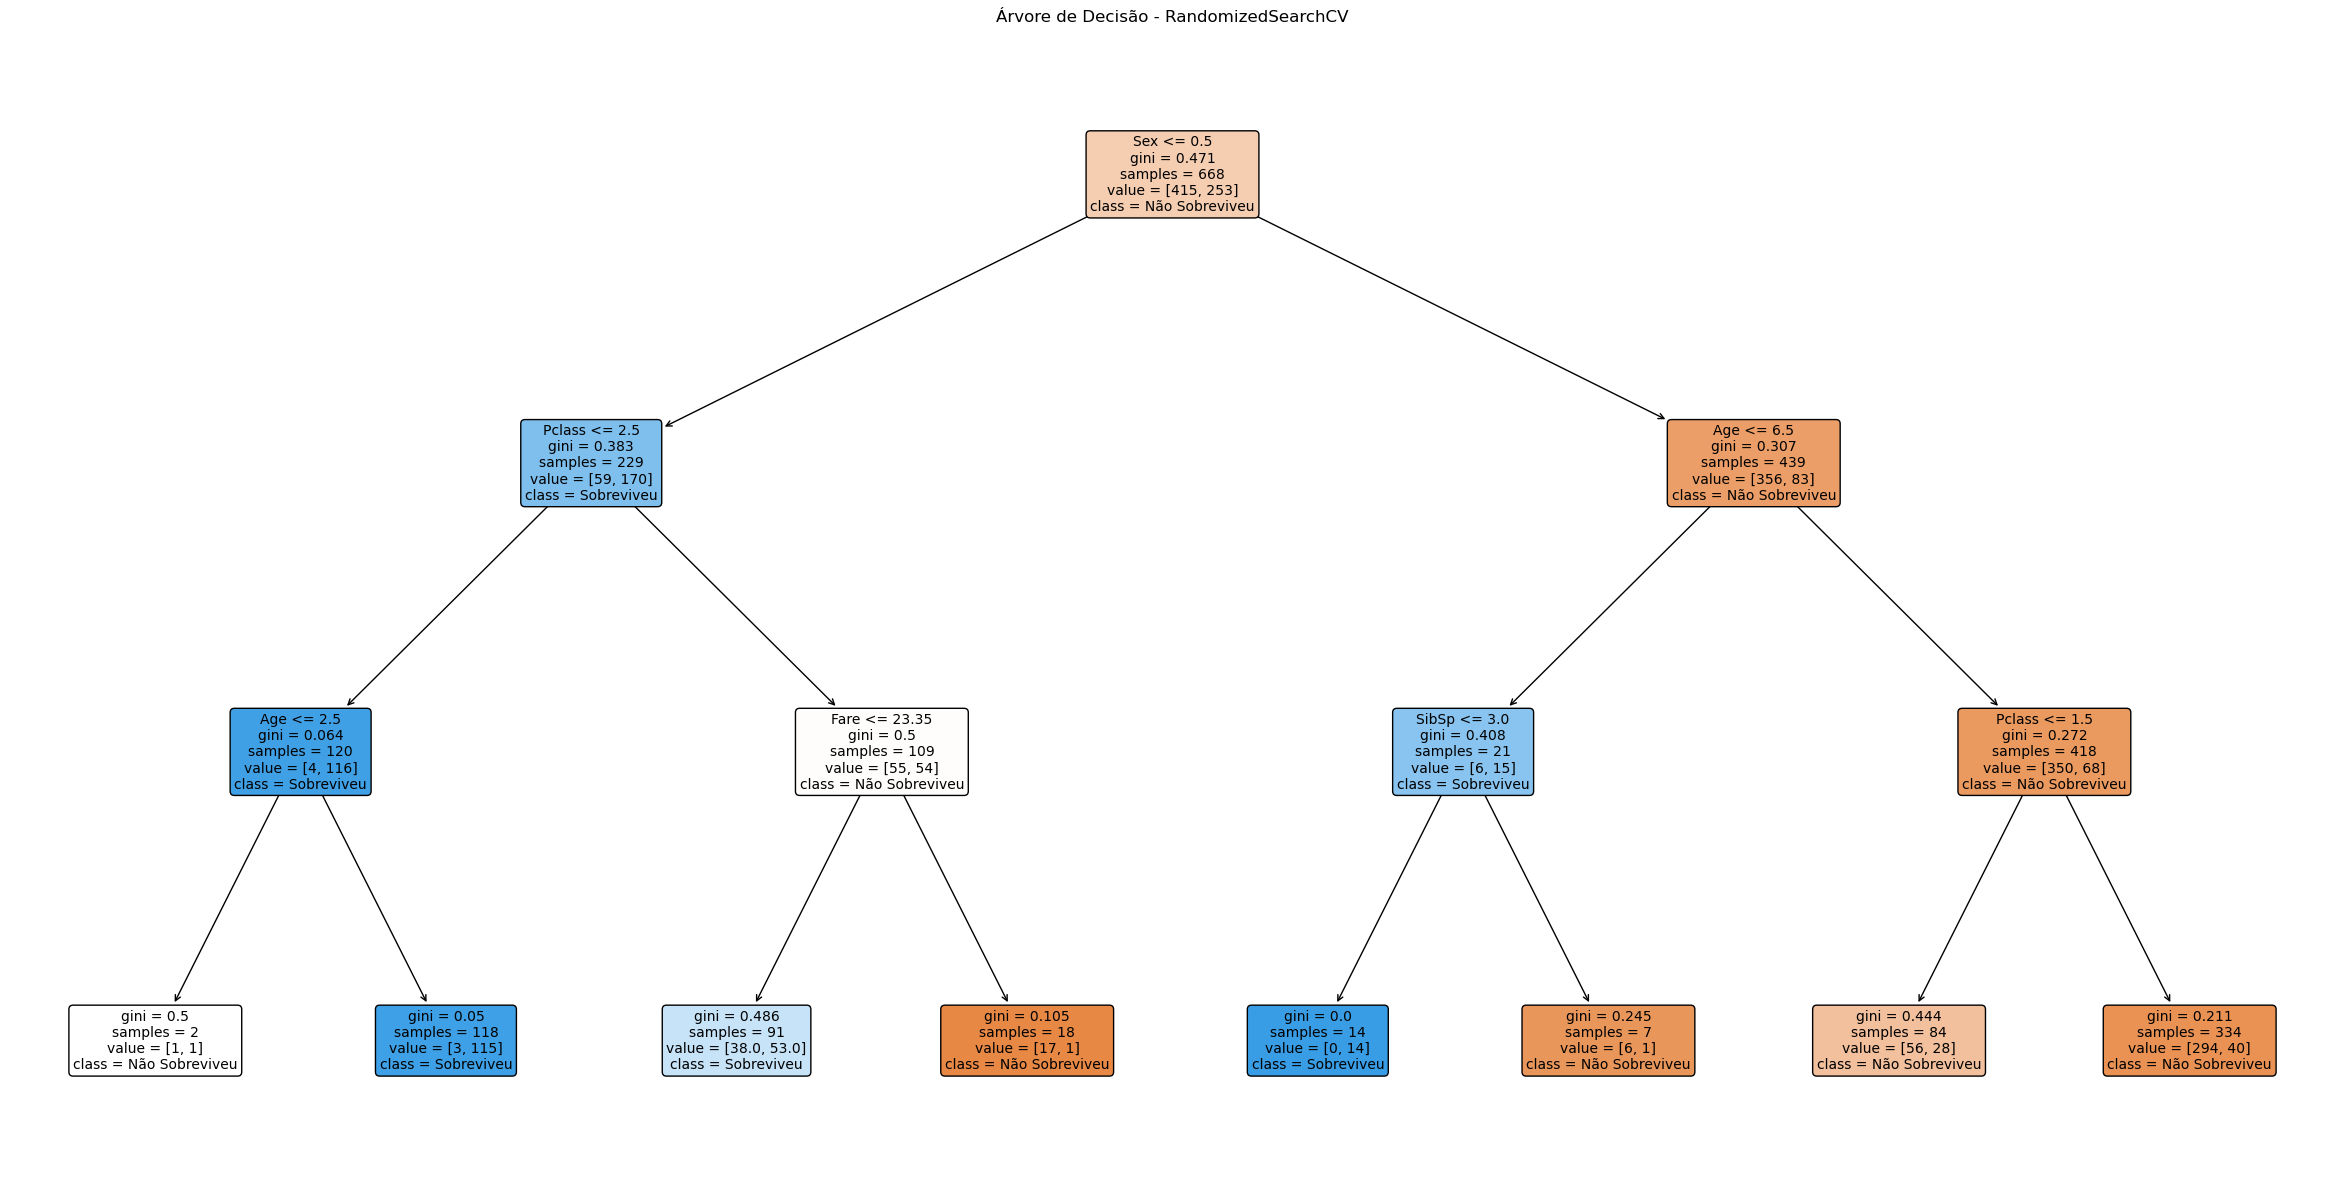

In [13]:
best_model_random = random_search.best_estimator_
plot_decision_tree(best_model_random, feature_names, ['Não Sobreviveu', 'Sobreviveu'], "Árvore de Decisão - RandomizedSearchCV")

In [14]:
bayes_search = BayesSearchCV(DecisionTreeClassifier(), param_bayes, n_iter=50, cv=5, scoring='accuracy', random_state=42)
bayes_search.fit(X_treino, y_treino)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(bayes_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(bayes_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
OrderedDict({'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 7})
Melhor pontuação de validação cruzada: 0.82


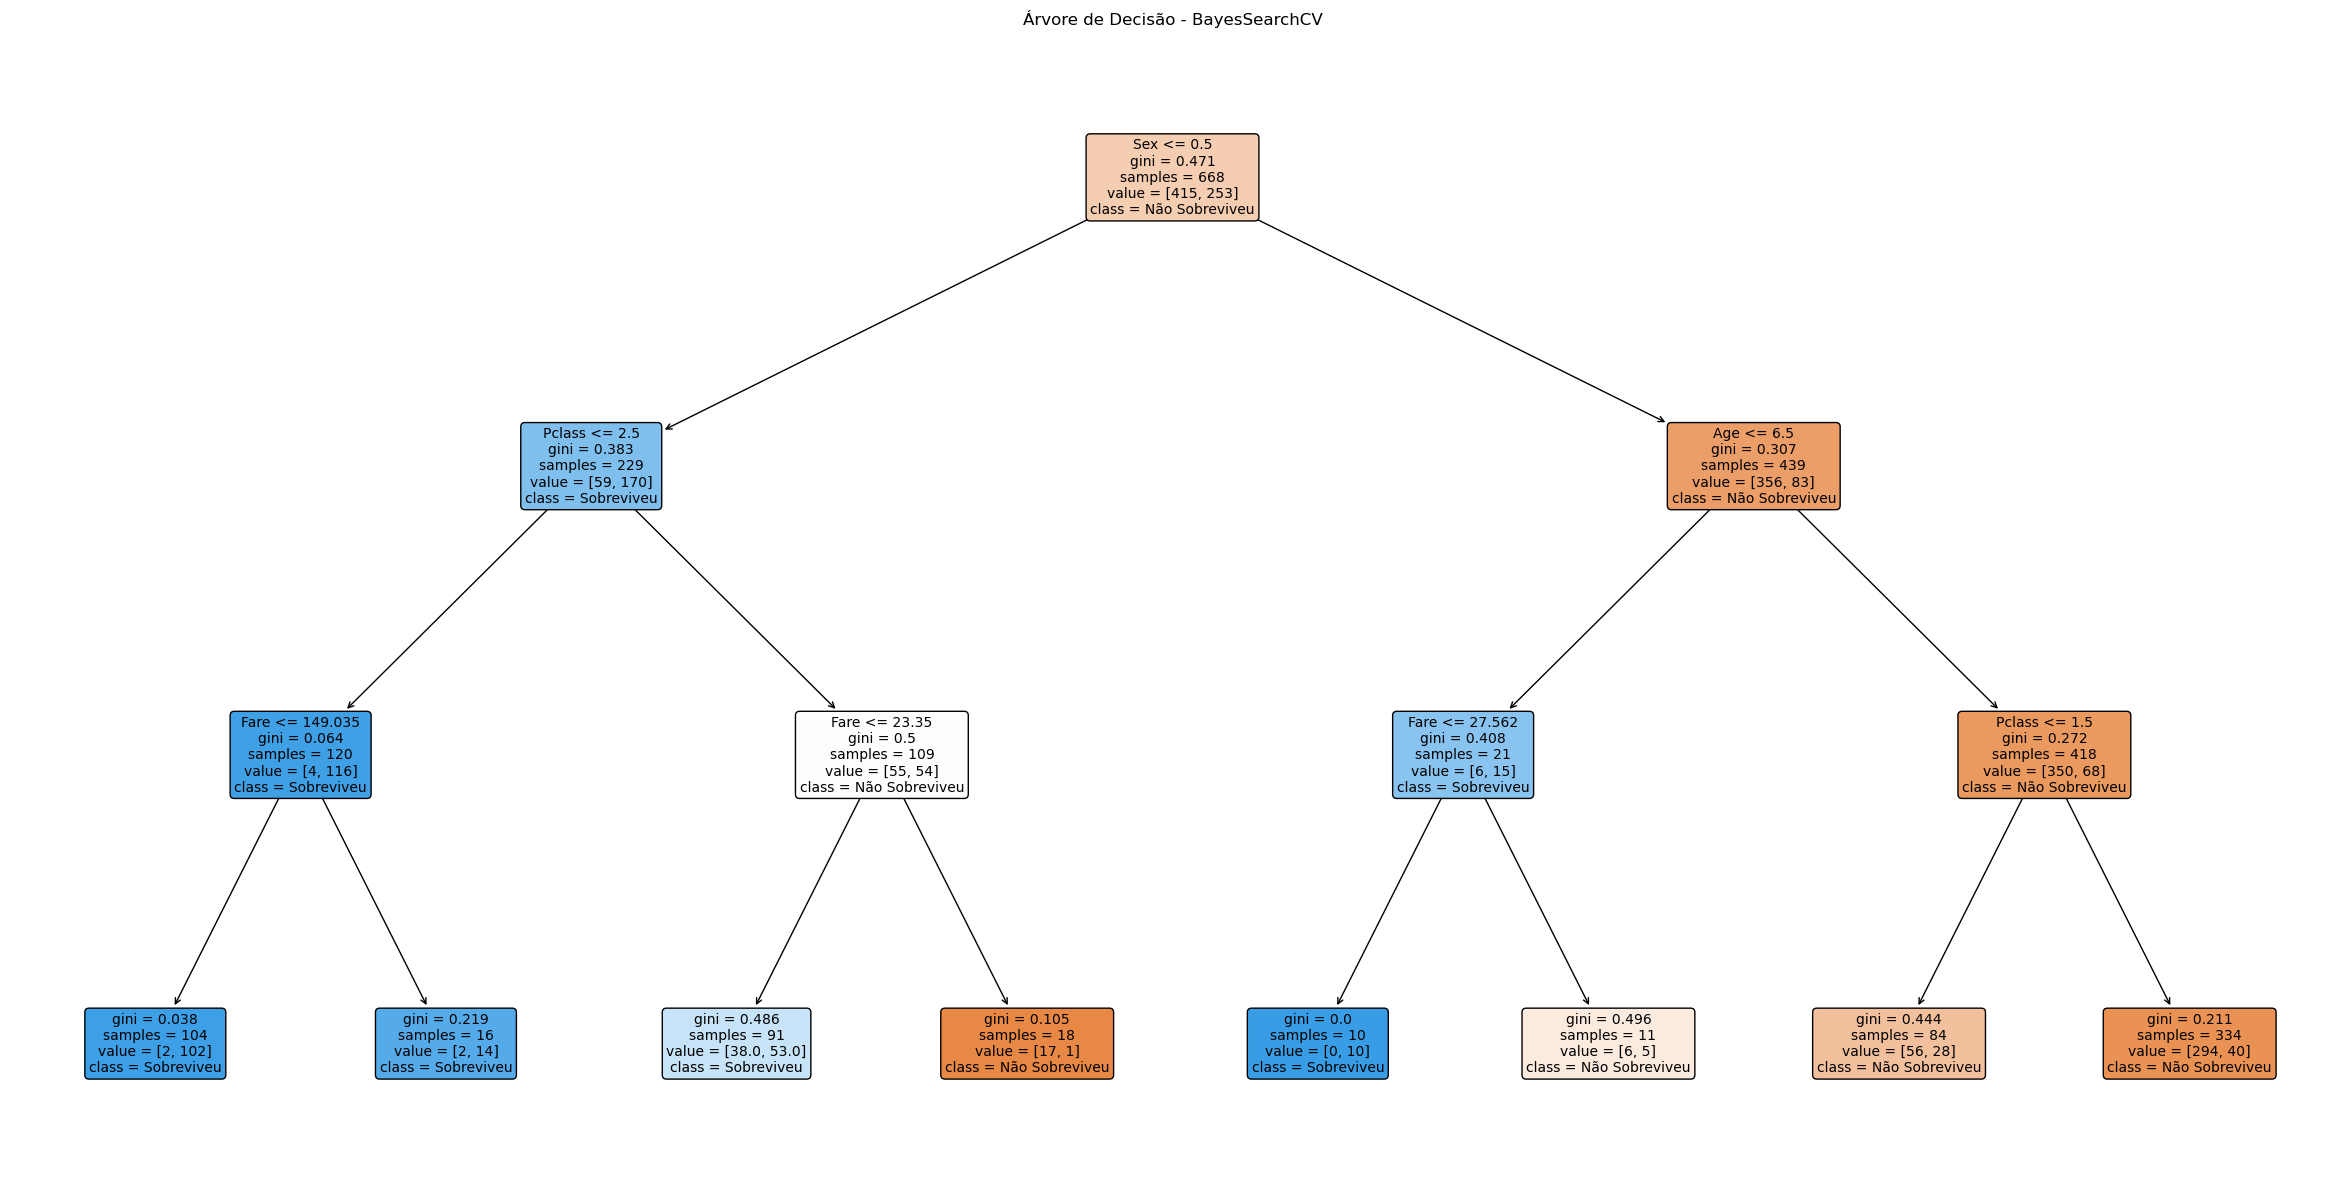

In [15]:
best_model_bayes = bayes_search.best_estimator_
plot_decision_tree(best_model_bayes, feature_names, ['Não Sobreviveu', 'Sobreviveu'], "Árvore de Decisão - BayesSearchCV")

In [16]:
previsoes_grid = best_model_grid.predict(X_teste)
accuracy_grid = accuracy_score(y_teste, previsoes_grid)
print("\nAcurácia do melhor modelo (GridSearchCV) no conjunto de teste: {:.2f}".format(accuracy_grid))


Acurácia do melhor modelo (GridSearchCV) no conjunto de teste: 0.81


In [17]:
previsoes_random = best_model_random.predict(X_teste)
accuracy_random = accuracy_score(y_teste, previsoes_random)
print("Acurácia do melhor modelo (RandomizedSearchCV) no conjunto de teste: {:.2f}".format(accuracy_random))

Acurácia do melhor modelo (RandomizedSearchCV) no conjunto de teste: 0.80


In [18]:
previsoes_bayes = best_model_bayes.predict(X_teste)
accuracy_bayes = accuracy_score(y_teste, previsoes_bayes)
print("Acurácia do melhor modelo (BayesSearchCV) no conjunto de teste: {:.2f}".format(accuracy_bayes))

Acurácia do melhor modelo (BayesSearchCV) no conjunto de teste: 0.80
